In [1]:
import sys
import os

sys.path.append("/home/vib9/src/SL-Net/superlayer/voxel")

from train import train
import argparse
import logging
import os
import sys

import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from torch import optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split

sys.path.append("../../")
sys.path.append("../../scripts/")
import superlayer.utils

from scripts import eval_net, train_net, get_args

from superlayer.models import AESuperNet, AEnet, cvpr2018_net
from superlayer.utils import BrainD, dice_coeff, one_hot, plot_img_array, plot_side_by_side

dir_img = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/vols/'
dir_mask = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/asegs/'

dir_train = '/home/vib9/src/SL-Net/jupyter/partitions/train.txt'
dir_val = '/home/vib9/src/SL-Net/jupyter/partitions/val.txt'
dir_scarce = '/home/vib9/src/SL-Net/jupyter/partitions/scarce_train.txt'

dir_checkpoint_1 = 'checkpoints_1/'
dir_checkpoint_2 = 'checkpoints_2/'

logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
args = get_args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logging.info(f'Using device {device}')

target_label_numbers = [0,2,3,4,10,16,17,28,31,41,42,43,49,53,63]
val_percent = 0.1
batch_size = args.batchsize
lr = args.lr
img_scale = args.scale
writer = SummaryWriter(comment=f'LR_{lr}_BS_{batch_size}_SCALE_{img_scale}')
enc_nf = [64, 64, 64, 64]
dec_nf = [64, 64, 64, 64]

INFO: Using device cuda


In [2]:
net2 = AESuperNet(input_ch=1, out_ch=15, use_bn=True, superblock_size=64, depth=4, ignore_last=True)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net2.to(device=device)
train_scores2, val_scores2, train_var_2, val_var_2 = train_net(net=net2,
                                                                epochs=5,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val,
                                                                segment=False)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 5865 examples
INFO: Creating dataset with 732 examples
INFO: Starting training:
        Epochs:          5
        Batch size:      8
        Learning rate:   0.001
        Training size:   5865
        Validation size: 732
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 22.72batch/s]
                                                                    INFO: Validation Dice Loss: 0.0074599076543453635
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 21.20batch/s]
                                                                    INFO: Validation Dice Loss: 0.0052651603153528095
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 10.34batch/s]
                                                                    INFO: Validation Dice Loss: 0.004434184959301582
Validation round:  92%|█████████

Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 22.22batch/s]
                                                                    INFO: Validation Dice Loss: 0.00318097774000777
Validation round: 100%|██████████| 91/91 [00:04<00:00, 24.47batch/s]
                                                                    INFO: Validation Dice Loss: 0.002947181849586931
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 24.53batch/s]
                                                                    INFO: Validation Dice Loss: 0.0027481938922102305
Epoch 1/5: 100%|██████████| 5865/5865 [01:04<00:00, 91.22img/s, loss (batch)=0.00232] 
INFO: Checkpoint 1 saved !
Validation round:  96%|█████████▌| 87/91 [00:04<00:00, 24.18batch/s]
                                                                    INFO: Validation Dice Loss: 0.0025457586801436905
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 27.02batch/s]
                                                                    INFO

Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 24.63batch/s]
                                                                    INFO: Validation Dice Loss: 0.0023079761700540943
Validation round:  92%|█████████▏| 84/91 [00:04<00:00, 23.01batch/s]
                                                                    INFO: Validation Dice Loss: 0.0022038557402953344
Validation round: 100%|██████████| 91/91 [00:04<00:00, 26.35batch/s]
                                                                    INFO: Validation Dice Loss: 0.0021387299722326653
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 26.95batch/s]
                                                                    INFO: Validation Dice Loss: 0.0020749407224254783
Validation round:  90%|█████████ | 82/91 [00:03<00:00, 23.64batch/s]


Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 24.15batch/s]
                                                                    INFO: Validation Dice Loss: 0.0020210258470807264
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 24.48batch/s]
                                                                    INFO: Validation Dice Loss: 0.001978697587868997
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 25.52batch/s]
                                                                    INFO: Validation Dice Loss: 0.002022138181408601
Epoch 2/5: 100%|██████████| 5865/5865 [01:07<00:00, 87.50img/s, loss (batch)=0.00206] 
INFO: Checkpoint 2 saved !
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 29.32batch/s]
                                                                    INFO: Validation Dice Loss: 0.0018915548206788007
Validation round:  96%|█████████▌| 87/91 [00:03<00:00, 24.80batch/s]
                                                                    INF

Validation round:  95%|█████████▍| 86/91 [00:04<00:00, 23.56batch/s]
                                                                    INFO: Validation Dice Loss: 0.0018138661353777235
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 24.56batch/s]
                                                                    INFO: Validation Dice Loss: 0.001800029759888875
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 23.68batch/s]
                                                                    INFO: Validation Dice Loss: 0.0017609925758973746
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 26.62batch/s]
                                                                    INFO: Validation Dice Loss: 0.0018135640772755494
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 19.44batch/s]
                                                                    INFO: Validation Dice Loss: 0.0017187733748149905
Validation round:  86%|████████▌ | 78/91 [00:03<00:00, 21.86batch/

Validation round: 100%|██████████| 91/91 [00:03<00:00, 27.97batch/s]
                                                                    INFO: Validation Dice Loss: 0.0017403596372517582
Validation round:  92%|█████████▏| 84/91 [00:04<00:00, 21.84batch/s]
                                                                    INFO: Validation Dice Loss: 0.0017067458912996309
Epoch 3/5: 100%|██████████| 5865/5865 [01:06<00:00, 88.52img/s, loss (batch)=0.00114] 
INFO: Checkpoint 3 saved !
Validation round:  96%|█████████▌| 87/91 [00:03<00:00, 25.61batch/s]
                                                                    INFO: Validation Dice Loss: 0.0016672157127266894
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 23.88batch/s]
                                                                    INFO: Validation Dice Loss: 0.0016943691912424434
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 22.63batch/s]
                                                                    I

                                                                    INFO: Validation Dice Loss: 0.001627302900018109
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 25.26batch/s]
                                                                    INFO: Validation Dice Loss: 0.001595997442184323
Validation round:  96%|█████████▌| 87/91 [00:04<00:00, 20.57batch/s]
                                                                    INFO: Validation Dice Loss: 0.0016053720367151302
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 25.54batch/s]
                                                                    INFO: Validation Dice Loss: 0.0015679080011118409
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 23.24batch/s]
                                                                    INFO: Validation Dice Loss: 0.0015685898111109714
Validation round:  93%|█████████▎| 85/91 [00:03<00:00, 23.86batch/s]
                                                                   

Validation round:  96%|█████████▌| 87/91 [00:04<00:00, 22.31batch/s]
                                                                    INFO: Validation Dice Loss: 0.0015511224967437785
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 20.29batch/s]
                                                                    INFO: Validation Dice Loss: 0.0015433523330612333
Validation round:  96%|█████████▌| 87/91 [00:04<00:00, 22.14batch/s]
                                                                    INFO: Validation Dice Loss: 0.0015153700695628976
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 21.32batch/s]
                                                                    INFO: Validation Dice Loss: 0.001500035726956532
Validation round:  97%|█████████▋| 88/91 [00:04<00:00, 24.40batch/s]
                                                                    INFO: Validation Dice Loss: 0.001503119637913347
Validation round:  95%|█████████▍| 86/91 [00:03<00:00, 22.98batch/s

Validation round: 100%|██████████| 91/91 [00:04<00:00, 23.61batch/s]
                                                                    INFO: Validation Dice Loss: 0.0014954105538960833
Validation round:  97%|█████████▋| 88/91 [00:04<00:00, 28.37batch/s]
                                                                    INFO: Validation Dice Loss: 0.001479234166474051
Validation round:  95%|█████████▍| 86/91 [00:03<00:00, 23.72batch/s]
                                                                    INFO: Validation Dice Loss: 0.0014593684163128774
Validation round:  96%|█████████▌| 87/91 [00:04<00:00, 22.82batch/s]
                                                                    INFO: Validation Dice Loss: 0.001505168965905086
Epoch 5/5: 100%|██████████| 5865/5865 [01:05<00:00, 88.91img/s, loss (batch)=0.00136]  
INFO: Checkpoint 5 saved !


In [3]:
net3 = AEnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=enc_nf, ignore_last=True)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net3.to(device=device)
train_scores3, val_scores3, train_var_3, val_var_3 = train_net(net=net3,
                                                                epochs=5,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val,
                                                                segment=False)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 5865 examples
INFO: Creating dataset with 732 examples
INFO: Starting training:
        Epochs:          5
        Batch size:      8
        Learning rate:   0.001
        Training size:   5865
        Validation size: 732
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round: 100%|██████████| 91/91 [00:04<00:00, 27.62batch/s]
                                                                    INFO: Validation Dice Loss: 0.008599544158921791
Validation round: 100%|██████████| 91/91 [00:04<00:00, 21.77batch/s]
                                                                    INFO: Validation Dice Loss: 0.006877368039727866
Validation round:  92%|█████████▏| 84/91 [00:03<00:00, 21.22batch/s]
                                                                    INFO: Validation Dice Loss: 0.006553330571278111
Validation round:  99%|█████████▉|

Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 20.70batch/s]
                                                                    INFO: Validation Dice Loss: 0.010771999739437968
Validation round: 100%|██████████| 91/91 [00:04<00:00, 24.36batch/s]
                                                                    INFO: Validation Dice Loss: 0.012117570163784445
Validation round:  96%|█████████▌| 87/91 [00:04<00:00, 20.15batch/s]
                                                                    INFO: Validation Dice Loss: 0.011972701084892174
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 27.66batch/s]
                                                                    INFO: Validation Dice Loss: 0.004587262922611374
Epoch 1/5: 100%|██████████| 5865/5865 [01:02<00:00, 93.81img/s, loss (batch)=0.00342] 
INFO: Checkpoint 1 saved !
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 24.85batch/s]
                                                                    INFO:

Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 22.47batch/s]
                                                                    INFO: Validation Dice Loss: 0.0045087425739269
Validation round: 100%|██████████| 91/91 [00:04<00:00, 25.02batch/s]
                                                                    INFO: Validation Dice Loss: 0.004297220918278282
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 27.47batch/s]
                                                                    INFO: Validation Dice Loss: 0.004344168213799924
Validation round:  95%|█████████▍| 86/91 [00:03<00:00, 25.10batch/s]
                                                                    INFO: Validation Dice Loss: 0.004635469015728641
Validation round:  92%|█████████▏| 84/91 [00:03<00:00, 21.37batch/s]
                                                                    INFO: Validation Dice Loss: 0.00392898546971872
Validation round:  59%|█████▉    | 54/91 [00:02<00:01, 20.16batch/s]


Validation round:  95%|█████████▍| 86/91 [00:03<00:00, 21.57batch/s]
                                                                    INFO: Validation Dice Loss: 0.00378396416563991
Validation round:  97%|█████████▋| 88/91 [00:03<00:00, 29.49batch/s]
                                                                    INFO: Validation Dice Loss: 0.003612477388642319
Validation round:  97%|█████████▋| 88/91 [00:03<00:00, 27.69batch/s]
                                                                    INFO: Validation Dice Loss: 0.0032332895226408163
Epoch 2/5: 100%|██████████| 5865/5865 [01:05<00:00, 89.71img/s, loss (batch)=0.00289] 
INFO: Checkpoint 2 saved !
Validation round:  96%|█████████▌| 87/91 [00:04<00:00, 21.90batch/s]
                                                                    INFO: Validation Dice Loss: 0.0031006070580538157
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 24.19batch/s]
                                                                    INFO

Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 27.68batch/s]
                                                                    INFO: Validation Dice Loss: 0.0028558402491098904
Validation round:  97%|█████████▋| 88/91 [00:03<00:00, 24.58batch/s]
                                                                    INFO: Validation Dice Loss: 0.0027066650007247597
Validation round: 100%|██████████| 91/91 [00:04<00:00, 24.03batch/s]
                                                                    INFO: Validation Dice Loss: 0.0027155099068205436
Validation round:  93%|█████████▎| 85/91 [00:03<00:00, 22.51batch/s]
                                                                    INFO: Validation Dice Loss: 0.0025897553487384058
Validation round:  93%|█████████▎| 85/91 [00:04<00:00, 23.63batch/s]
                                                                    INFO: Validation Dice Loss: 0.0024394380404603676
Validation round:  46%|████▌     | 42/91 [00:02<00:02, 16.98batch

Validation round:  96%|█████████▌| 87/91 [00:03<00:00, 22.63batch/s]
                                                                    INFO: Validation Dice Loss: 0.00237941870639858
Validation round:  93%|█████████▎| 85/91 [00:04<00:00, 21.86batch/s]
                                                                    INFO: Validation Dice Loss: 0.002405618996727843
Epoch 3/5: 100%|██████████| 5865/5865 [01:06<00:00, 88.55img/s, loss (batch)=0.0028]  
INFO: Checkpoint 3 saved !
Validation round:  92%|█████████▏| 84/91 [00:04<00:00, 19.75batch/s]
                                                                    INFO: Validation Dice Loss: 0.002306218896122588
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 28.08batch/s]
                                                                    INFO: Validation Dice Loss: 0.0022602066625380416
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 24.07batch/s]
                                                                    INFO:

Validation round:  96%|█████████▌| 87/91 [00:04<00:00, 23.40batch/s]
                                                                    INFO: Validation Dice Loss: 0.0022416172285594947
Validation round: 100%|██████████| 91/91 [00:04<00:00, 25.63batch/s]
                                                                    INFO: Validation Dice Loss: 0.002342480790013304
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 22.15batch/s]
                                                                    INFO: Validation Dice Loss: 0.0021721909633725064
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 25.59batch/s]
                                                                    INFO: Validation Dice Loss: 0.002198170288465917
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 24.24batch/s]
                                                                    INFO: Validation Dice Loss: 0.002096615062647878
Validation round:  45%|████▌     | 41/91 [00:02<00:03, 16.61batch/s]

Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 26.66batch/s]
                                                                    INFO: Validation Dice Loss: 0.002070045179257599
Epoch 4/5: 100%|██████████| 5865/5865 [01:07<00:00, 87.45img/s, loss (batch)=0.00221] 
INFO: Checkpoint 4 saved !
Validation round:  97%|█████████▋| 88/91 [00:03<00:00, 25.23batch/s]
                                                                    INFO: Validation Dice Loss: 0.00202770313826277
Validation round:  97%|█████████▋| 88/91 [00:04<00:00, 23.23batch/s]
                                                                    INFO: Validation Dice Loss: 0.002075907524808177
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 22.89batch/s]
                                                                    INFO: Validation Dice Loss: 0.002067055111843069
Validation round: 100%|██████████| 91/91 [00:04<00:00, 26.07batch/s]
                                                                    INFO: 

Validation round: 100%|██████████| 91/91 [00:04<00:00, 22.09batch/s]
                                                                    INFO: Validation Dice Loss: 0.001918968167616525
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 20.10batch/s]
                                                                    INFO: Validation Dice Loss: 0.0018755171299594771
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 26.55batch/s]
                                                                    INFO: Validation Dice Loss: 0.0020456206178865754
Validation round:  96%|█████████▌| 87/91 [00:04<00:00, 24.09batch/s]
                                                                    INFO: Validation Dice Loss: 0.0018921048805158544
Validation round:  96%|█████████▌| 87/91 [00:04<00:00, 19.14batch/s]
                                                                    INFO: Validation Dice Loss: 0.0020817393375622047
Epoch 5/5: 100%|██████████| 5865/5865 [01:06<00:00, 87.91img/s, lo

In [6]:
import math

train_path = '/home/vib9/src/SL-Net/jupyter/partitions/train.txt'
val_path = '/home/vib9/src/SL-Net/jupyter/partitions/val.txt'

train = BrainD(dir_img, dir_mask, id_file=train_path, label_numbers=target_label_numbers)
val = BrainD(dir_img, dir_mask, id_file=val_path, label_numbers=target_label_numbers)

train_loader = DataLoader(train, batch_size=2, shuffle=True, num_workers=8, pin_memory=True)
val_loader = DataLoader(val, batch_size=2, shuffle=False, num_workers=8, pin_memory=True, drop_last=True)

n_val = len(val)
n_train = len(train)
dataset_size = n_val + n_train

# Get the first batch
train_batch = next(iter(train_loader))

inputs_train = train_batch['image']

INFO: Creating dataset with 5865 examples
INFO: Creating dataset with 732 examples


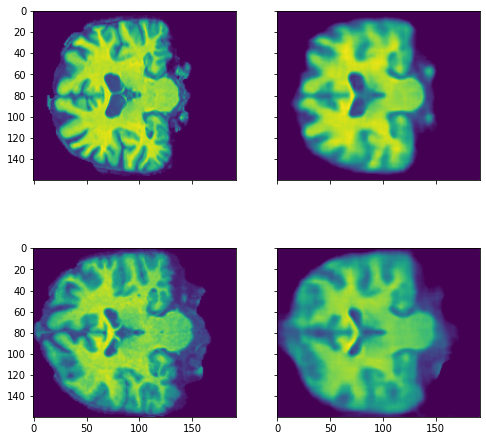

In [7]:
net2.eval() 
inputs = inputs_train.to(device=device, dtype=torch.float32)

# Predict
pred = net2(inputs)
# The loss functions include the sigmoid function.
pred = pred.data.cpu().numpy()

input_images_rgb = [x.squeeze(0) for x in inputs.cpu().numpy()]
pred_rgb = [x.squeeze(0) for x in pred]

plot_side_by_side([input_images_rgb, pred_rgb])

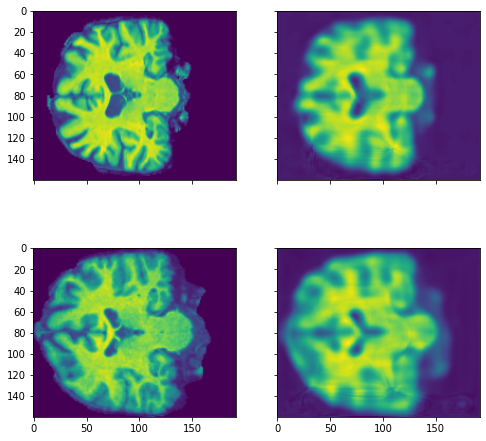

In [8]:
net3.eval() 
inputs = inputs_train.to(device=device, dtype=torch.float32)

# Predict
pred = net3(inputs)
# The loss functions include the sigmoid function.
pred = pred.data.cpu().numpy()

input_images_rgb = [x.squeeze(0) for x in inputs.cpu().numpy()]
pred_rgb = [x.squeeze(0) for x in pred]

plot_side_by_side([input_images_rgb, pred_rgb])

configuring combined plots


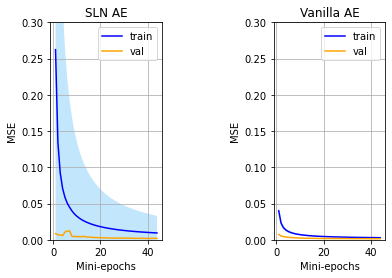

In [10]:
print("configuring combined plots")
domain = len(train_scores2)
x_values = [i+1 for i in range(domain)]

a2 = plt.subplot(1,2,2)
a2.set_ylim([0, 0.3])
plt.title("Vanilla AE")
plt.xlabel("Mini-epochs")
plt.ylabel("MSE")

ziptrainup = [a + b for a, b in zip(train_scores2, train_var_2)]
ziptraindown = [a - b for a, b in zip(train_scores2, train_var_2)]
zipvalup = [a + b for a, b in zip(val_scores2, val_var_2)]
zipvaldown = [a - b for a, b in zip(val_scores2, val_var_2)]

plt.plot(x_values, train_scores2, color="blue", label="train")
a2.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores2, color="orange", label="val")
a2.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a3 = plt.subplot(1,2,1)
a3.set_ylim([0, 0.3])
plt.title("SLN AE")
plt.xlabel("Mini-epochs")
plt.ylabel("MSE")

ziptrainup = [a + b for a, b in zip(train_scores3, train_var_3)]
ziptraindown = [a - b for a, b in zip(train_scores3, train_var_3)]
zipvalup = [a + b for a, b in zip(val_scores3, val_var_3)]
zipvaldown = [a - b for a, b in zip(val_scores3, val_var_3)]

plt.plot(x_values, train_scores3, color="blue", label="train")
a3.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores3, color="orange", label="val")
a3.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.subplots_adjust(wspace=1)

plt.show()